[  4.16206240e-10   8.93939913e-06  -4.13495890e-02   1.74113616e+02]
[998, 5796, 8682, 12579, 17143, 20990, 27078, 30644, 37350, 40932, 46895]
[142.16411788775977, 315.79707349837281, 761.31811237946249, 1896.8824156256742, 4189.2483183794611, 7093.6893012751461, 13872.370220236335, 19278.496352083155, 32786.416903211677, 42001.77712953015, 60816.840055892746]


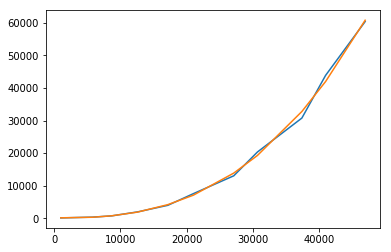

[-32.164117887759772, 34.202926501627189, -21.318112379462491, 63.117584374325816, -209.24831837946113, 469.31069872485386, -832.37022023633472, 1061.5036479168448, -2014.416903211677, 1888.22287046985, -406.84005589274602]


In [1]:
import numpy as np

import matplotlib.pyplot as plt

velocities = [
    998, 5796, 8682, 12579, 17143, 20990, 27078, 30644, 37350, 40932, 46895 #, 51378, 57346, 60097,
]

stopping_distances = [
    110, 350, 740, 1960, 3980, 7563, 13040, 20340, 30772, 43890, 60410 #, 78498, 100917, 139302,
]


npres = np.polyfit(velocities, stopping_distances, deg=3)

fitted_vals = list(map(lambda x: npres[0] * (x**3) + npres[1] * (x**2) + npres[2] * x + npres[3], velocities))
print(npres)

print(velocities)
print(fitted_vals)
'''
npres[0] * x^3 + npres[1] * x^2 + npres[2] * x + npres[3]
'''

plt.plot(velocities, stopping_distances)
plt.plot(velocities, fitted_vals)
plt.show()
errors = list(map(lambda x: x[0] - x[1], zip(stopping_distances, fitted_vals)))
print(errors)